In [148]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.api as sm 

In [149]:
df = pd.read_csv("weatherAUS.csv")

In [175]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Quarter,Month,Weakday,Day
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,9.4,20.9,No,0.0,No,2017,2,6,1,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,10.1,22.4,No,0.0,No,2017,2,6,2,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,10.9,24.5,No,0.0,No,2017,2,6,3,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,12.5,26.1,No,0.0,No,2017,2,6,4,23
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,15.1,26.0,No,0.0,No,2017,2,6,5,24


In [193]:
df["Location"].value_counts(ascending=False)

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Adelaide            3020
Launceston          3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Nuriootpa           2996
Albany              2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
GoldCoast           2924
Witchcliffe         2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


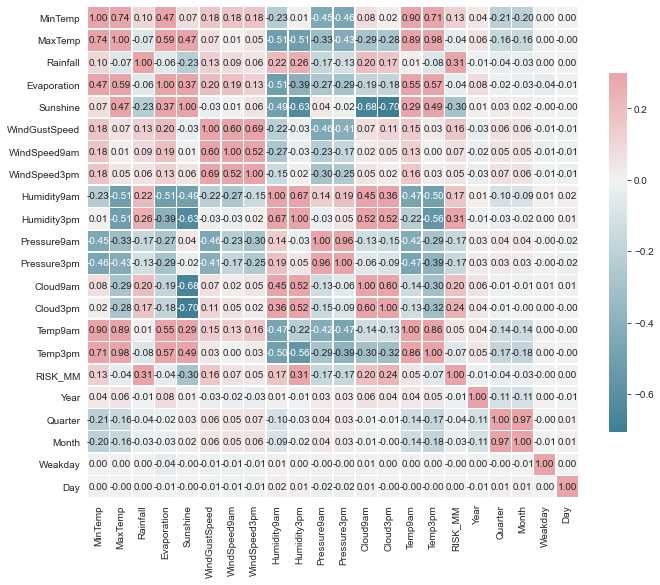

In [176]:
plt.subplots(figsize=(11,11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),vmax=.3, annot=True,center=0, cmap=cmap, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .6});


In [151]:
df["Rainfall"].isna().sum()

1406

In [152]:
df["RainToday"].isna().sum()

1406

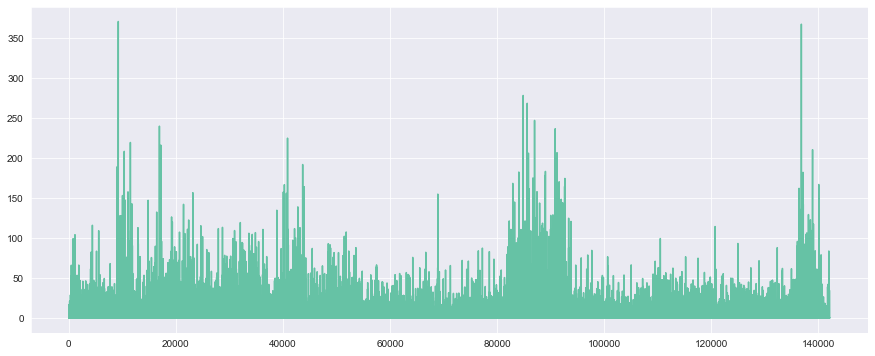

In [179]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
plt.plot(df["Rainfall"])

## Explanatory Analysis

In [153]:
df.dropna(subset=["Date", "Rainfall"], inplace=True)

In [154]:
df.isna().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [196]:
df['Date'] = pd.to_datetime(df['Date'])

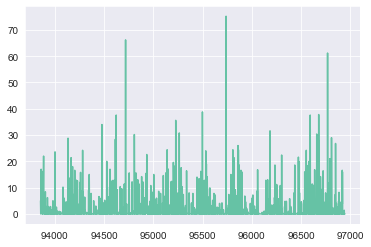

In [203]:
plt.plot(df[df.Location == "Adelaide"]["Rainfall"])

In [200]:
df[df.Location == "Canberra"].shape

(3402, 29)

In [156]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Weakday'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day

In [184]:
monthly_mean = df[df.RainToday == "Yes"].groupby("Month").aggregate("mean")["Rainfall"]
monthly_mean = df.groupby("Month").aggregate("mean")["Rainfall"]
monthly_mean = pd.DataFrame(monthly_mean)

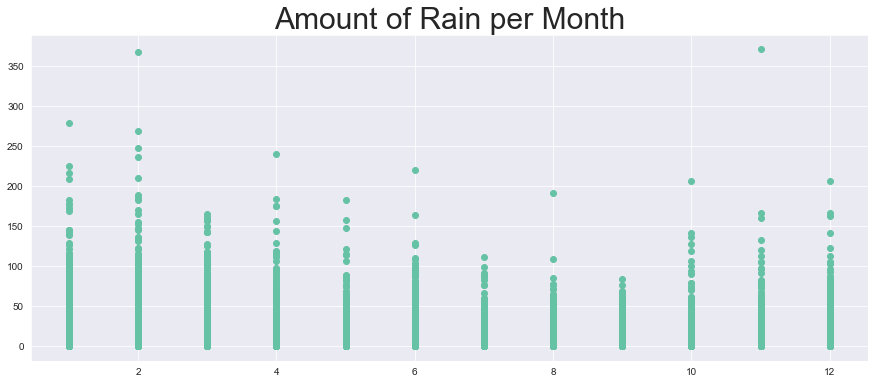

In [185]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
plt.scatter(df['Month'], df['Rainfall'])
plt.title( "Amount of Rain per Month",size = 30)
plt.show()

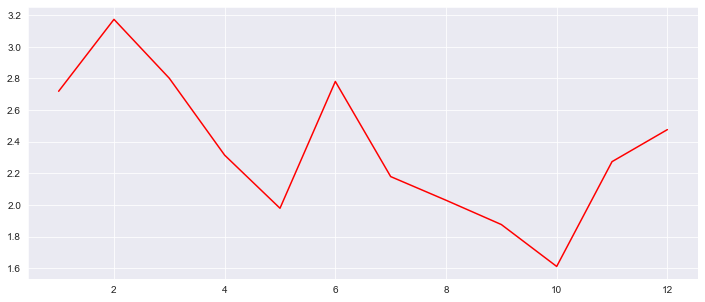

In [186]:
plt.figure(figsize=(12,5))
plt.plot(monthly_mean.index, monthly_mean, color='r')
plt.show()

In [187]:
quarterly_mean = df[df.RainToday == "Yes"].groupby("Quarter").aggregate("mean")["Rainfall"]
quarterly_mean = pd.DataFrame(quarterly_mean)

In [180]:
monthly_mean

,Rainfall
Month,
1,14.163343
2,15.127848
3,12.698278
4,10.446389
5,8.664216
6,10.309429
7,7.800254
8,7.782999
9,7.966745


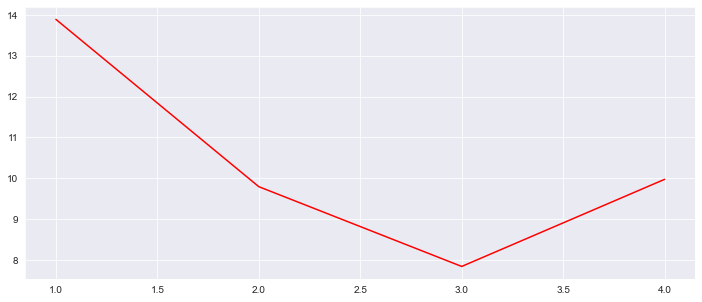

In [161]:
plt.figure(figsize=(12,5))
plt.plot(quarterly_mean.index, quarterly_mean, color='r')
plt.show()

ToDos: Autokorrelationsfunktion 

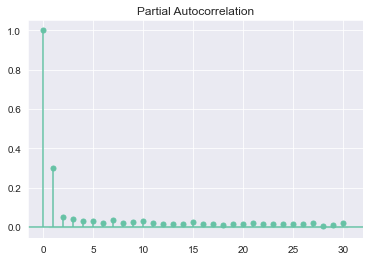

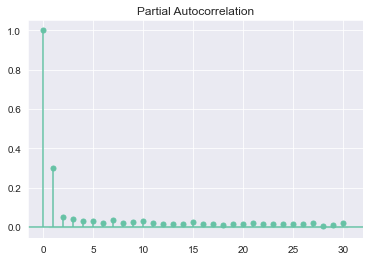

In [171]:
#plt.figure(figsize=(20,10))
sm.graphics.tsa.plot_pacf(df["Rainfall"], lags=30)

(array([-700, -699, -698, ...,  698,  699,  700]),
 array([0.09611868, 0.10407737, 0.10140237, ..., 0.10140237, 0.10407737,
        0.09611868]),
 <matplotlib.lines.Line2D at 0x23651bf7b80>)

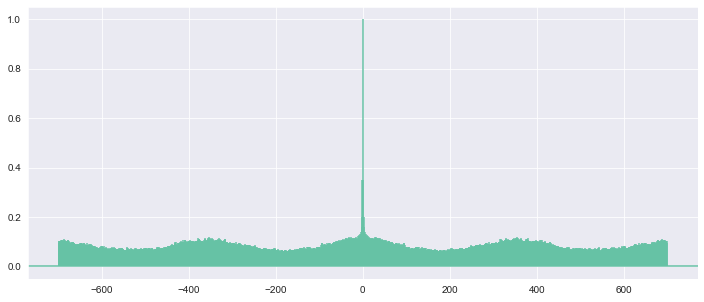

In [178]:
plt.figure(figsize=(12,5))
plt.acorr(df["Rainfall"], maxlags = 700)

In [164]:
mit diesen Ergebnissen (Periode = 12) dann moving average und Bereinigung um Saisonale Komponente 

SyntaxError: invalid syntax (<ipython-input-164-054644c2ae59>, line 1)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(df["Date"], df["Rainfall"]);

ToDo: Über Monate aggegieren und Autokorrelation plotten (siehe Matlab Übung 1)